In [72]:
import pandas as pd
import datetime as dt
import footballData as fd
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
import time
import Elo as ELO
import seaborn as sns


In [73]:
df1888=pd.read_csv('englandthesis.csv')
df1888

/Users/andrewpuopolo/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Date,Season,home,visitor,FT,hgoal,vgoal,division,tier,totgoal,goaldif,result
0,1,1888-12-15,1888,Accrington F.C.,Aston Villa,1-1,1,1,1,1,2,0,D
1,2,1889-01-19,1888,Accrington F.C.,Blackburn Rovers,0-2,0,2,1,1,2,-2,A
2,3,1889-03-23,1888,Accrington F.C.,Bolton Wanderers,2-3,2,3,1,1,5,-1,A
3,4,1888-12-01,1888,Accrington F.C.,Burnley,5-1,5,1,1,1,6,4,H
4,5,1888-10-13,1888,Accrington F.C.,Derby County,6-2,6,2,1,1,8,4,H
5,6,1888-12-29,1888,Accrington F.C.,Everton,3-1,3,1,1,1,4,2,H
6,7,1889-01-26,1888,Accrington F.C.,Notts County,1-2,1,2,1,1,3,-1,A
7,8,1888-10-20,1888,Accrington F.C.,Preston North End,0-0,0,0,1,1,0,0,D
8,9,1889-04-20,1888,Accrington F.C.,Stoke City,2-0,2,0,1,1,2,2,H
9,10,1888-11-24,1888,Accrington F.C.,West Bromwich Albion,2-1,2,1,1,1,3,1,H


In [74]:
startdate=1958
fulldf=df1888[df1888['Season']>=startdate]
fulldf=fulldf.sort_values('Date')
fulldf=fulldf.reset_index()
fulldf=fulldf.replace('Milton Keynes Dons', 'Wimbledon')
fulldf

,index,Unnamed: 0,Date,Season,home,visitor,FT,hgoal,vgoal,division,tier,totgoal,goaldif,result
0,75629,75630,1958-08-23,1958,Swindon Town,Wrexham,1-0,1,0,3,3,1,1,H
1,75423,75424,1958-08-23,1958,Notts County,Accrington Stanley,1-1,1,1,3,3,2,0,D
2,75745,75746,1958-08-23,1958,Carlisle United,Aldershot,1-0,1,0,4,4,1,1,H
3,75743,75744,1958-08-23,1958,Bradford Park Avenue,Workington,3-2,3,2,4,4,5,1,H
4,74746,74747,1958-08-23,1958,Cardiff City,Barnsley,0-1,0,1,2,2,1,-1,A
5,75708,75709,1958-08-23,1958,Barrow,Gateshead,0-3,0,3,4,4,3,-3,A
6,74337,74338,1958-08-23,1958,Burnley,Manchester City,3-4,3,4,1,1,7,-1,A
7,74783,74784,1958-08-23,1958,Charlton Athletic,Sheffield United,1-1,1,1,2,2,2,0,D
8,74827,74828,1958-08-23,1958,Fulham,Stoke City,6-1,6,1,2,2,7,5,H
9,75637,75638,1958-08-23,1958,Tranmere Rovers,Doncaster Rovers,3-0,3,0,3,3,3,3,H


In [75]:
def CalendarYear(Date):
    return int(Date.split('-')[0])
CalendarYear(fulldf['Date'][0])
def Month(Date):
    return int(Date.split('-')[1])
fulldf['CalendarYear']=fulldf.apply(lambda row: CalendarYear(row['Date']), axis=1)
fulldf['Month']=fulldf.apply(lambda row: Month(row['Date']), axis=1)

In [35]:
fulldf

,index,Unnamed: 0,Date,Season,home,visitor,FT,hgoal,vgoal,division,tier,totgoal,goaldif,result,Month,CalendarYear
0,75629,75630,1958-08-23,1958,Swindon Town,Wrexham,1-0,1,0,3,3,1,1,H,8,1958
1,75423,75424,1958-08-23,1958,Notts County,Accrington Stanley,1-1,1,1,3,3,2,0,D,8,1958
2,75745,75746,1958-08-23,1958,Carlisle United,Aldershot,1-0,1,0,4,4,1,1,H,8,1958
3,75743,75744,1958-08-23,1958,Bradford Park Avenue,Workington,3-2,3,2,4,4,5,1,H,8,1958
4,74746,74747,1958-08-23,1958,Cardiff City,Barnsley,0-1,0,1,2,2,1,-1,A,8,1958
5,75708,75709,1958-08-23,1958,Barrow,Gateshead,0-3,0,3,4,4,3,-3,A,8,1958
6,74337,74338,1958-08-23,1958,Burnley,Manchester City,3-4,3,4,1,1,7,-1,A,8,1958
7,74783,74784,1958-08-23,1958,Charlton Athletic,Sheffield United,1-1,1,1,2,2,2,0,D,8,1958
8,74827,74828,1958-08-23,1958,Fulham,Stoke City,6-1,6,1,2,2,7,5,H,8,1958
9,75637,75638,1958-08-23,1958,Tranmere Rovers,Doncaster Rovers,3-0,3,0,3,3,3,3,H,8,1958


In [76]:
initdictionary={}
initvalues=[1750,1500,1250,1000]
initialrows=[]
#This needs to be rewritten so we don't have to run it over an dover again
for i in range(len(fulldf['home'].unique())):
    Team=fulldf['home'].unique()[i]
    Teamdf=fulldf[fulldf['home']==Team].reset_index()
    Tier=int(Teamdf['tier'][0])
    initialrow=[Team, Tier]
    initialrows.append(initialrow)
#Needs to be rewritten to optimize using BuildEloDict Function
for a in range(len(initialrows)):
    initdictionary[initialrows[a][0]]=initvalues[initialrows[a][1]-1]



In [77]:
initdictionary

{'AFC Bournemouth': 1250,
 'AFC Wimbledon': 1000,
 'Accrington': 1000,
 'Accrington Stanley': 1250,
 'Aldershot': 1000,
 'Arsenal': 1750,
 'Aston Villa': 1750,
 'Barnet': 1000,
 'Barnsley': 1500,
 'Barrow': 1000,
 'Birmingham City': 1750,
 'Blackburn Rovers': 1750,
 'Blackpool': 1750,
 'Bolton Wanderers': 1750,
 'Boston United': 1000,
 'Bradford City': 1250,
 'Bradford Park Avenue': 1000,
 'Brentford': 1250,
 'Brighton & Hove Albion': 1500,
 'Bristol City': 1500,
 'Bristol Rovers': 1500,
 'Burnley': 1750,
 'Burton Albion': 1000,
 'Bury': 1250,
 'Cambridge United': 1000,
 'Cardiff City': 1500,
 'Carlisle United': 1000,
 'Charlton Athletic': 1500,
 'Chelsea': 1750,
 'Cheltenham': 1000,
 'Chester': 1000,
 'Chesterfield': 1250,
 'Colchester United': 1250,
 'Coventry City': 1000,
 'Crawley Town': 1000,
 'Crewe Alexandra': 1000,
 'Crystal Palace': 1000,
 'Dagenham and Redbridge': 1000,
 'Darlington': 1000,
 'Derby County': 1500,
 'Doncaster Rovers': 1250,
 'Everton': 1750,
 'Exeter City': 10

In [78]:
def loglik(k, initHF, Hk):
    boolean=0
    avgE=0
    HFA=initHF
    logliks=0.0
    burn_in=2
    Elodictionary=initdictionary.copy()
    startyear=fulldf['Season'].values[0]
    HFAyear=fulldf['Season'].values[0]
    HFcounter=0.
    Gamecounter=0.
    Rs=0
    #logcount=0
    HFATime=[]
    for ind, row in fulldf.iterrows():
        Home=row['home']
        Away=row['visitor']
        HomeGoals=row['hgoal']
        AwayGoals=row['vgoal']
        year=row['Season']
        CalendarYear=row['CalendarYear']
        Month=row['Month']
        HomeELO=Elodictionary[Home]
        AwayELO=Elodictionary[Away]
        Elodif=float((HomeELO-AwayELO+HFA)/400.0)
        avgE+=Elodif
        E=1/(10**(-1*(Elodif))+1)
        #Write Lambda Functions for this to calculate Rvalue and Loglik, gets rid of if statements
        Resfun = lambda x,y: (x > y)*1 + (x == y)*(.5)+(x<y)*0
        R=Resfun(HomeGoals, AwayGoals)
        mloglikfun = lambda x,y: np.log(np.sqrt(y*(1-y))) if x==.5 else np.log((-1*x)+1+(2*x-1)*y)
        MatchLogLik= mloglikfun(R, E)
        #if HomeGoals>AwayGoals:
         #   R=1
          #  MatchLogLik=np.log(E)
       # elif HomeGoals<AwayGoals:
        #    R=0
         #   MatchLogLik=np.log(1-E)
       # else:
        #    R=.5
         #   MatchLogLik=np.log(np.sqrt(E*(1-E)))
        if(R==.5):
            PointExchange=(R-E)*k
        else
        Elodictionary[Home]=HomeELO+PointExchange
        Elodictionary[Away]=AwayELO-PointExchange
        
        
  #      logcount+=-1*np.log10((1-E)/E)
        if year>(startyear+burn_in):
            #print(HFcounter)
            logliks+=MatchLogLik
            Gamecounter+=1.
            HFcounter+=(R-E)
            Rs+=R

        if year>(HFAyear) and year >(startyear+burn_in):
            #print(Gamecounter)
            HFAyear=year
            #avgE=avgE/Gamecounter
            #avgE=0
           
            #logcount=0
            #print(HFcounter)
            #print([HFAyear, HFcounter/Gamecounter, HFA])
            
           
            if(Gamecounter>1):
                #print([year, HFcounter/Gamecounter])
                HFATime.append([HFA, HFAyear, Rs/Gamecounter ])
                HFA+=(HFcounter/Gamecounter)*Hk
                Gamecounter=0           
                Rs=0
                HFcounter=0

    print([k, initHF, Hk, HFA, np.sum(logliks)])
    #print(Elodictionary)
    
    return FACupELOS

In [ ]:
#### gridsearch=[]
for a in range(10,40,1):
    for b in range(40,100,4):
        l=loglik(a,b)
        z=[a,b,-1*l]
        print(z)
        gridsearch.append(z)

In [47]:
loglik(19.3377, 70.71, 328.73)

[19.3377, 70.71, 328.73, 51.34151444577552, -33769.22497425542]


{'AFC Bournemouth': 1449.711368611921,
 'AFC Wimbledon': 1059.6901430850091,
 'Accrington': 1093.1799869775953,
 'Aldershot': 1062.1102197302505,
 'Arsenal': 1833.5576223730134,
 'Aston Villa': 1581.113147117858,
 'Barnet': 1043.2908149268042,
 'Barnsley': 1365.1479656667955,
 'Birmingham City': 1386.609437041612,
 'Blackburn Rovers': 1513.087217053793,
 'Blackpool': 1378.4166069155012,
 'Bolton Wanderers': 1490.2341978348288,
 'Boston United': 1034.538818086564,
 'Bradford City': 1213.2166297003919,
 'Brentford': 1390.8891277302728,
 'Brighton & Hove Albion': 1520.7115424729486,
 'Bristol City': 1306.0766257242217,
 'Bristol Rovers': 1051.1026550366612,
 'Burnley': 1579.0544479120642,
 'Burton Albion': 1139.7205026494837,
 'Bury': 1136.7941373440337,
 'Cambridge United': 1017.2864172550278,
 'Cardiff City': 1526.6756498454722,
 'Carlisle United': 1179.5315046776013,
 'Charlton Athletic': 1430.9917928038826,
 'Chelsea': 1846.0521130932893,
 'Cheltenham': 1086.452296703338,
 'Chester': 

In [169]:
np.random.uniform(0,1000)

242.7244706152194

In [30]:
from scipy.optimize import minimize
mins=[]
for i in range(5):
    initk=np.random.uniform(0,100)
    inithf=np.random.uniform(50,200)
    inithk=np.random.uniform(0,1000)
    x0=[initk,inithf, inithk]
    res=minimize(lambda x: loglik(*x),x0, method='SLSQP', bounds=[[0,300], [0,2000], [0,1000]],
                 options={'disp': True})
    row=[i, initk, inithf,inithk,  res['x'][0], res['x'][1], res['x'][2], res['fun']]
    print(row)
    mins.append(row)

[80.326001224417482, 128.04708145966825, 843.49196765676129, 45.114260142856388, -35043.358776383546]
[80.326001224417482, 128.04708145966825, 843.49196765676129, 45.114260142856388, -35043.358776383546]
[80.326001239318643, 128.04708145966825, 843.49196765676129, 45.114260143512226, -35043.358776804678]
[80.326001224417482, 128.04708147456941, 843.49196765676129, 45.114260142860815, -35043.35877640071]
[80.326001224417482, 128.04708145966825, 843.49196767166245, 45.114260142687733, -35043.358776384208]
[52.064282474417482, 126.89522599091825, 843.44753406301129, 43.960093158028869, -34312.299348201799]
[52.064282474417482, 126.89522599091825, 843.44753406301129, 43.960093158028869, -34312.299348201799]
[52.064282489318643, 126.89522599091825, 843.44753406301129, 43.960093158610221, -34312.299348542831]
[52.064282474417482, 126.89522600581941, 843.44753406301129, 43.960093158034113, -34312.299348218781]
[52.064282474417482, 126.89522599091825, 843.44753407791245, 43.960093157878717, -3

[19.333225737872965, 65.207301459262595, 841.87243153856093, 42.631772746326533, -33773.567510670509]
[19.333225752774126, 65.207301459262595, 841.87243153856093, 42.631772746942154, -33773.567510670342]
[19.333225737872965, 65.207301474163756, 841.87243153856093, 42.631772746329553, -33773.567510670327]
[19.333225737872965, 65.207301459262595, 841.87243155346209, 42.631772746191118, -33773.567510670677]
[19.625384089816766, 66.687248018234385, 841.76589843184422, 42.645134236750465, -33773.667524334502]
[19.362441573067347, 65.355296115159774, 841.8617782278892, 42.633106707068144, -33773.567857461094]
[19.345886072241854, 65.271433181528991, 841.86781505320835, 42.632350740581167, -33773.567395242571]
[19.345886072241854, 65.271433181528991, 841.86781505320835, 42.632350740581167, -33773.567395242571]
[19.345886087143015, 65.271433181528991, 841.86781505320835, 42.632350741196902, -33773.567395243306]
[19.345886072241854, 65.271433196430152, 841.86781505320835, 42.632350740584158, -3

[79.768041199403015, 81.25353512086653, 635.23510045771422, 47.822004298985519, -34990.667307386924]
[79.768041199403015, 81.25353512086653, 635.23510045771422, 47.822004298985519, -34990.667307386924]
[79.768041214304176, 81.25353512086653, 635.23510045771422, 47.822004299772189, -34990.667307807438]
[79.768041199403015, 81.253535135767692, 635.23510045771422, 47.82200429898819, -34990.667307389886]
[79.768041199403015, 81.25353512086653, 635.23510047261539, 47.822004298735223, -34990.667307387106]
[51.547826355653015, 81.05480465211653, 635.22289342646422, 46.426675964378191, -34263.67386593455]
[51.547826355653015, 81.05480465211653, 635.22289342646422, 46.426675964378191, -34263.67386593455]
[51.547826370554176, 81.05480465211653, 635.22289342646422, 46.426675965079269, -34263.67386627457]
[51.547826355653015, 81.054804667017692, 635.22289342646422, 46.426675964381516, -34263.673865937883]
[51.547826355653015, 81.05480465211653, 635.22289344136539, 46.426675964144287, -34263.673865

[19.327249252260657, 67.681795691379861, 634.27407751290912, 44.956493206994722, -33771.090367225857]
[19.333693297513374, 67.718287899143192, 634.28803021705858, 44.956563411539669, -33771.090233669049]
[19.33616028680958, 67.732258298545503, 634.29337176424508, 44.956590303434815, -33771.09021191833]
[19.337255653390166, 67.738461288013795, 634.29574346171694, 44.956602246408195, -33771.090207473855]
[19.337773686999263, 67.741394878538102, 634.29686511269915, 44.956607895201131, -33771.090206488683]
[19.3380259795182, 67.742823594609632, 634.29741137870724, 44.956610646409246, -33771.090206268382]
[19.338150605376562, 67.743529342713131, 634.29768121972518, 44.956612005466297, -33771.090206222536]
[19.338212600157799, 67.743880415113836, 634.29781545137746, 44.956612681533443, -33771.090206214976]
[19.338243544933473, 67.744055653359197, 634.2978824532812, 44.956613018995228, -33771.090206214853]
[19.338259016447282, 67.744143267532294, 634.29791595234065, 44.956613187717075, -33771

[19.584434193624453, 65.667584446452366, 936.92970715999388, 41.705192390502468, -33775.129110273847]
[19.584434208525614, 65.667584446452366, 936.92970715999388, 41.705192391093092, -33775.129110281552]
[19.584434193624453, 65.667584461353528, 936.92970715999388, 41.705192390505559, -33775.129110274247]
[19.584434193624453, 65.667584446452366, 936.92970717489504, 41.705192390333401, -33775.129110274407]
[19.412224532601854, 64.2611071791966, 936.79302934327006, 41.699632519043114, -33775.05333920462]
[19.412224532601854, 64.2611071791966, 936.79302934327006, 41.699632519043114, -33775.05333920462]
[19.412224547503016, 64.2611071791966, 936.79302934327006, 41.699632519633099, -33775.053339206846]
[19.412224532601854, 64.261107194097761, 936.79302934327006, 41.699632519046133, -33775.053339204555]
[19.412224532601854, 64.2611071791966, 936.79302935817122, 41.699632518874253, -33775.053339204758]
[19.34079088456026, 64.441291545751056, 936.78652931103682, 41.696915164917499, -33775.04478

[19.344080882431378, 65.611816070345341, 934.98299784387143, 41.717647332245505, -33775.025277433539]
[19.344080897332539, 65.611816070345341, 934.98299784387143, 41.717647332836059, -33775.025277433997]
[19.344080882431378, 65.611816085246502, 934.98299784387143, 41.717647332248561, -33775.025277433917]
[19.344080882431378, 65.611816070345341, 934.98299785877259, 41.71764733207786, -33775.025277433742]
[19.330261983580122, 65.576347999642238, 935.01030379865074, 41.716785211543502, -33775.02459941258]
[19.330261983580122, 65.576347999642238, 935.01030379865074, 41.716785211543502, -33775.02459941258]
[19.330261998481284, 65.576347999642238, 935.01030379865074, 41.716785212133992, -33775.024599413046]
[19.330261983580122, 65.576348014543399, 935.01030379865074, 41.716785211546579, -33775.024599413016]
[19.330261983580122, 65.576347999642238, 935.0103038135519, 41.716785211375857, -33775.024599413162]
[19.235929450470206, 65.376058954094916, 935.05885499641636, 41.712461113349718, -3377

[19.335570882655514, 70.685365051651473, 328.74157676342708, 51.34110125674497, -33769.225008308611]
[19.335570882655514, 70.685365051651473, 328.74157676342708, 51.34110125674497, -33769.225008308611]
[19.335570897556675, 70.685365051651473, 328.74157676342708, 51.341101257476041, -33769.225008308618]
[19.335570882655514, 70.685365066552635, 328.74157676342708, 51.34110125674983, -33769.225008308582]
[19.335570882655514, 70.685365051651473, 328.74157677832824, 51.341101256357945, -33769.225008308771]
[19.337259426567183, 70.704139310728749, 328.73656904390873, 51.341320302774008, -33769.224980694082]
[19.337259426567183, 70.704139310728749, 328.73656904390873, 51.341320302774008, -33769.224980694082]
[19.337259441468344, 70.704139310728749, 328.73656904390873, 51.341320303505171, -33769.22498069398]
[19.337259426567183, 70.70413932562991, 328.73656904390873, 51.341320302778911, -33769.224980693958]
[19.337259426567183, 70.704139310728749, 328.73656905880989, 51.341320302387025, -33769

[8.0011615797226483, 111.18129266027807, 915.67980807385277, 41.681859598125847, -34042.392969894223]
[23.062848546151876, 114.28224887441145, 915.96256960501216, 42.088108479029103, -33810.993302221541]
[23.062848546151876, 114.28224887441145, 915.96256960501216, 42.088108479029103, -33810.993302221541]
[23.062848561053038, 114.28224887441145, 915.96256960501216, 42.088108479631892, -33810.993302315619]
[23.062848546151876, 114.28224888931261, 915.96256960501216, 42.088108479034517, -33810.993302235634]
[23.062848546151876, 114.28224887441145, 915.96256961991332, 42.088108478871725, -33810.993302222269]
[16.427963763965696, 111.98649322937798, 915.80106872614783, 41.823648849087427, -33805.330032780119]
[16.427963763965696, 111.98649322937798, 915.80106872614783, 41.823648849087427, -33805.330032780119]
[16.427963778866857, 111.98649322937798, 915.80106872614783, 41.82364884965444, -33805.330032676662]
[16.427963763965696, 111.98649324427915, 915.80106872614783, 41.823648849092635, -3

In [24]:
mins

NameError: name 'mins' is not defined

In [ ]:
#Build EloDict Function
#Write function so I don't have to do the unique teams a bunch of times

In [101]:
#Learn Lambda Functions to get rid of all these if statements

array([-0.02612305, -0.00952148, -0.01025391])

In [ ]:
#For next time, tidy up code write functions for things that can be functionized
#Run Grid Search for k and fixed HFA, map out paramater space, then randomly start within fairly broad bounds, 
#and plot optimizer value where it ends up for each of the things


In [174]:
#To debug home field advantage paramter, see what it looks like season to season
#Do we want to average, do we want to sum?
#Write out math and see what it should look like in a system


[[233.5864331340309,
  998.9710651661671,
  20.965555339295662,
  66.351277862254221],
 [108.4554664963999,
  709.2944308764833,
  20.973566403774193,
  66.345148364112504],
 [86.27764393037869,
  566.3431064308577,
  20.962664337045126,
  66.342051379548323],
 [5.917080890415127,
  760.1370943616207,
  20.961936311183226,
  66.333483670299586],
 [105.46165755083963,
  139.1730110175714,
  20.971031285154201,
  66.38743381525093],
 [236.6043674343262,
  344.65709100796124,
  20.964070064050514,
  66.355564393797522],
 [50.107141630991755,
  391.187505734847,
  20.965965898678459,
  66.352991810055144],
 [116.32310514227126,
  787.3594786094552,
  20.966945745919066,
  66.348999208816366],
 [32.957198965567, 377.1248508904208, 20.967671416170589, 66.287518505271336],
 [171.8642864861183,
  415.58682446861417,
  20.971665934500734,
  66.367442689829772],
 [267.11459210436124,
  107.69863066158491,
  20.9697558211085,
  66.360961845269784],
 [44.05682232817747,
  47.99173176802252,
  20.9

In [204]:
cols2=['k', 'HFA', 'loglik']
gridsearchdf=pd.DataFrame(gridsearch, columns=cols2)

In [415]:
xs=(minsdf['optk'].values.flatten()-10)
ys=(-1*minsdf['optHF'].values.flatten()+100)/4

plots = gridsearchdf.pivot("HFA", "k", "loglik")
plots=plots-maxloglik

#fig = plt.figure()
#ax = fig.add_subplot(111, aspect='equal')
sns.set_style("darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
sns.heatmap(plots, cmap="YlGnBu")
#plt.ylim([50,70])
#plt.xlim([15,25])
#plt.xlabel('k value')
#plt.ylabel('Home Field Advantage')
#plt.title('Heat Map With Burn In Period Of 5 Years')
ax.scatter(xs, ys, marker='*', s=100, color='red') 
#plt.show()
plt.savefig('optimizer.png')

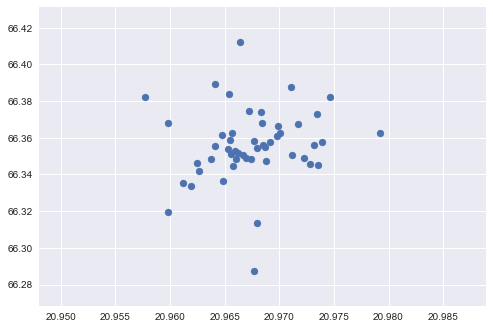

In [389]:
plt.scatter( x=minsdf['optk'],y= minsdf['optHF'])
plt.show()

In [ ]:
#Finish Scatter Plot with Optimizer
#Rerun with 3 variables, k, initHF, Hk using old Hk methodology average (R-E)
#2-3 plots in a slide Plot 1: Showing optimizer works, Plot 2: HFA vs time Plot 3: Plot 3: HFA vs sum(R/N)

In [427]:
columns=['HFA', 'Year', 'Results']
HFATimePlotdf=pd.DataFrame(HFATimePlot, columns=columns)

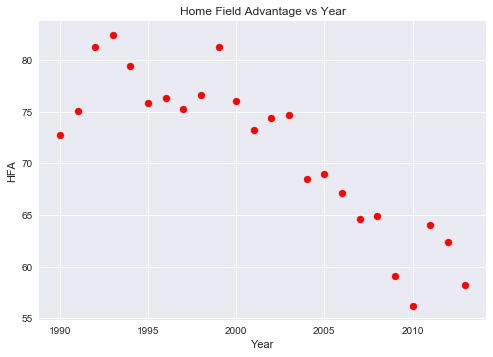

In [410]:
plt.scatter(x=HFATimePlotdf['Year'],y= HFATimePlotdf['HFA'], color='R')
plt.xlabel('Year')
plt.ylabel('HFA')
plt.title('Home Field Advantage vs Year')
plt.savefig('HFA vs Year.png')
plt.show()

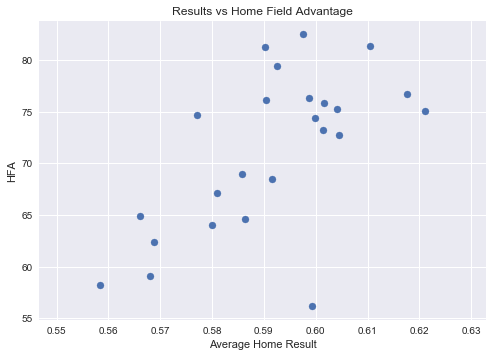

In [411]:
plt.scatter(x=HFATimePlotdf['Results'],y= HFATimePlotdf['HFA'])
plt.xlabel('Average Home Result')
plt.ylabel('HFA')
plt.title('Results vs Home Field Advantage')
plt.savefig('Results vs Home Field Advantage')
plt.show()

In [416]:
HFATimePlotdf

,HFA,Year,Results
0,72.699810,1990,0.604566
1,75.063337,1991,0.621071
2,81.318681,1992,0.610454
3,82.478985,1993,0.597633
4,79.446070,1994,0.592456
5,75.817664,1995,0.601578
6,76.365333,1996,0.598723
7,75.239325,1997,0.604126
8,76.668260,1998,0.617633
9,81.224302,1999,0.590128


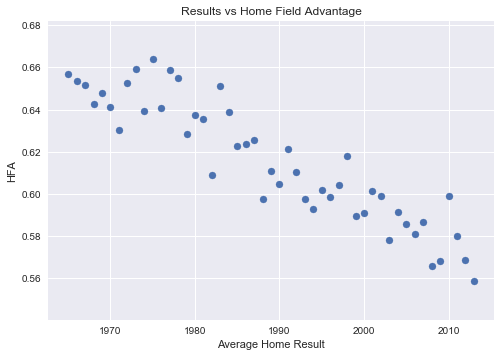

In [429]:
plt.scatter(y=HFATimePlotdf['Results'],x= HFATimePlotdf['Year'])
plt.xlabel('Average Home Result')
plt.ylabel('HFA')
plt.title('Results vs Home Field Advantage')
plt.savefig('HFA By Year')
plt.show()

In [41]:
ClassDF=pd.DataFrame.from_dict(Elodict, orient='index')

,0
Chesterfield,1196.494058
Bolton Wanderers,1490.234198
Walsall,1234.022697
Rochdale,1161.936758
Cardiff City,1526.675650
West Ham United,1600.163565
Manchester United,1807.670170
Liverpool,1828.924388
Wrexham,1006.102600
Stockport County,1012.778565


In [58]:
FACupDictionarylist[1][2]

{'AFC Bournemouth': 1273.8428931432295,
 'AFC Wimbledon': 1000,
 'Accrington': 1000,
 'Accrington Stanley': 1152.364888583296,
 'Aldershot': 951.6651870264916,
 'Arsenal': 1737.4763441464097,
 'Aston Villa': 1688.5539481368628,
 'Barnet': 1000,
 'Barnsley': 1310.390458708459,
 'Barrow': 910.4125394692134,
 'Birmingham City': 1717.9006956782605,
 'Blackburn Rovers': 1786.2449275113288,
 'Blackpool': 1743.1519295867772,
 'Bolton Wanderers': 1796.8101023639304,
 'Boston United': 1000,
 'Bradford City': 1253.776069674784,
 'Bradford Park Avenue': 1008.0370595097614,
 'Brentford': 1295.9380487930946,
 'Brighton & Hove Albion': 1453.8790899910052,
 'Bristol City': 1438.5809687205772,
 'Bristol Rovers': 1506.828119279102,
 'Burnley': 1804.595112068415,
 'Burton Albion': 1000,
 'Bury': 1325.1089212914462,
 'Cambridge United': 1000,
 'Cardiff City': 1576.1551711548086,
 'Carlisle United': 1029.6140567519858,
 'Charlton Athletic': 1504.1968468142404,
 'Chelsea': 1737.0874368462855,
 'Cheltenham'

In [80]:
rows=[]
for i in range(len(FACupDictionarylist)):
    Year=FACupDictionarylist[i][0]
    Yeardict=FACupDictionarylist[i][2]
    for key, value in Yeardict.items():
        temp = [key,value, Year]
        rows.append(temp)

In [81]:
columns=['Team', 'ELO', 'Year']
FACupELO=pd.DataFrame(rows,columns=columns)

In [82]:
FACupELO.to_csv('FACupELO.csv')